<a href="https://colab.research.google.com/github/IreneCarrasco/AI_and_ML_projects/blob/main/ML_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to resource


https://www.geeksforgeeks.org/ml-credit-card-fraud-detection/

Dataset

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [5]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("creditcard.csv")

In [6]:
# A first sight to
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
# Description of data
print(data.shape)
print(data.describe())

(245601, 31)
                Time             V1             V2             V3  \
count  245601.000000  245601.000000  245601.000000  245601.000000   
mean    84100.177438      -0.043878      -0.019547       0.114126   
std     42147.838726       1.961548       1.672675       1.505940   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     49815.000000      -0.939484      -0.607357      -0.693656   
50%     76692.000000      -0.009005       0.062184       0.305818   
75%    126136.000000       1.259759       0.781399       1.109678   
max    152822.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  245601.000000  245601.000000  245601.000000  245601.000000   
mean        0.029957      -0.041684       0.020474      -0.016718   
std         1.415156       1.376978       1.325868       1.228648   
min        -5.683171     -42.147898     -26.160506     -43.557242   
25%        -0.833469

The values of the variable 'Class' range between the minimum value, which is 0, and the maximum value, which is 1. Therefore, in this case, it has been assigned the value 1 to the 'Class' variable to indicate that credit card fraud has occurred, while the value 0 indicates that no fraud has been committed and the card is valid

In [8]:
data['Class'].unique()

array([ 0.,  1., nan])

In [10]:
# How are our data?
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1] # Creates a df  with data where Class is set as 1, for fraudulent transactions
valid = data[data['Class'] == 0] # Creates a df  with data where Class is set as 0, for valid transactions
outlierFraction = len(fraud)/float(len(valid))
print('Fraud fraction respect to valid transactions')
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

Fraud fraction respect to valid transactions
0.0018315242442413044
Fraud Cases: 449
Valid Transactions: 245151


We had only a 0.18% fraudulent transactions out all the transactions.

Despite we have very unbalanced data, we are applying some models on this dataset without balancing to study its accuracy

In [ ]:
# Details for fraudulent transactions
# We present basic statistics for the 'Amount' column in the 'fraud' dataframe
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count      86.000000
mean       93.996860
std       260.195133
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [11]:
# Details for normal transactions
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    245151.000000
mean         90.978622
std         252.598904
min           0.000000
25%           6.000000
50%          23.350000
75%          79.950000
max       19656.530000
Name: Amount, dtype: float64

The average monetary transaction for fraudulent cases is higher, making it imperative to address this issue.

We are going to plot the correlation matrix to confirm if there is any dependence between the variables in the dataframe with fraudulent transactions.

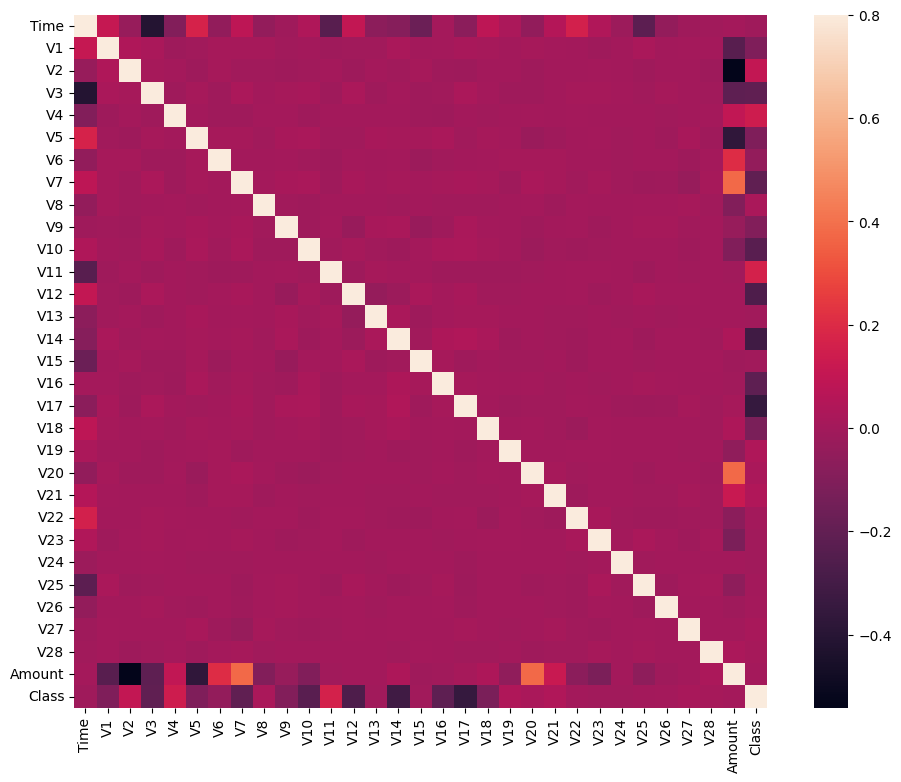

In [12]:
# Plotting the correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Despite there are not features with strong correlation, there are some features with strong negative correlation, as V2 and V5 with the feature Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

In [13]:
# dividing the X and the Y from the dataset

# We have many columns, drop method is the fastest way to split the data
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(245601, 30)
(245601,)


In [14]:
# Dividing the dataset into training and test
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

The cell below, while following the tutorial, encountered an error since it did not account for NaN values. Consequently, I made a modification to prevent this error.

I applied dropna() method and run again the model

In [30]:

# Building the Random Forest Classifier (RANDOM FOREST)
# from sklearn.ensemble import RandomForestClassifier
# random forest model creation
# rfc = RandomForestClassifier()
# rfc.fit(xTrain, yTrain)
# predictions
# yPred = rfc.predict(xTest)

In [32]:
# dividing the X and the Y from the dataset

# We have many columns, drop method is the fastest way to split the data
X = data.drop(['Class'], axis = 1)
Y = data["Class"]

# Remove NaN values
X = X.dropna()
Y = Y.dropna()

print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(245600, 30)
(245600,)


In [33]:
# Dividing the dataset into training and test
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


In [34]:

# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [35]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9996946254071661
The precision is 0.9565217391304348
The recall is 0.8461538461538461
The F1-Score is 0.8979591836734695
The Matthews correlation coefficient is0.8994993302740064


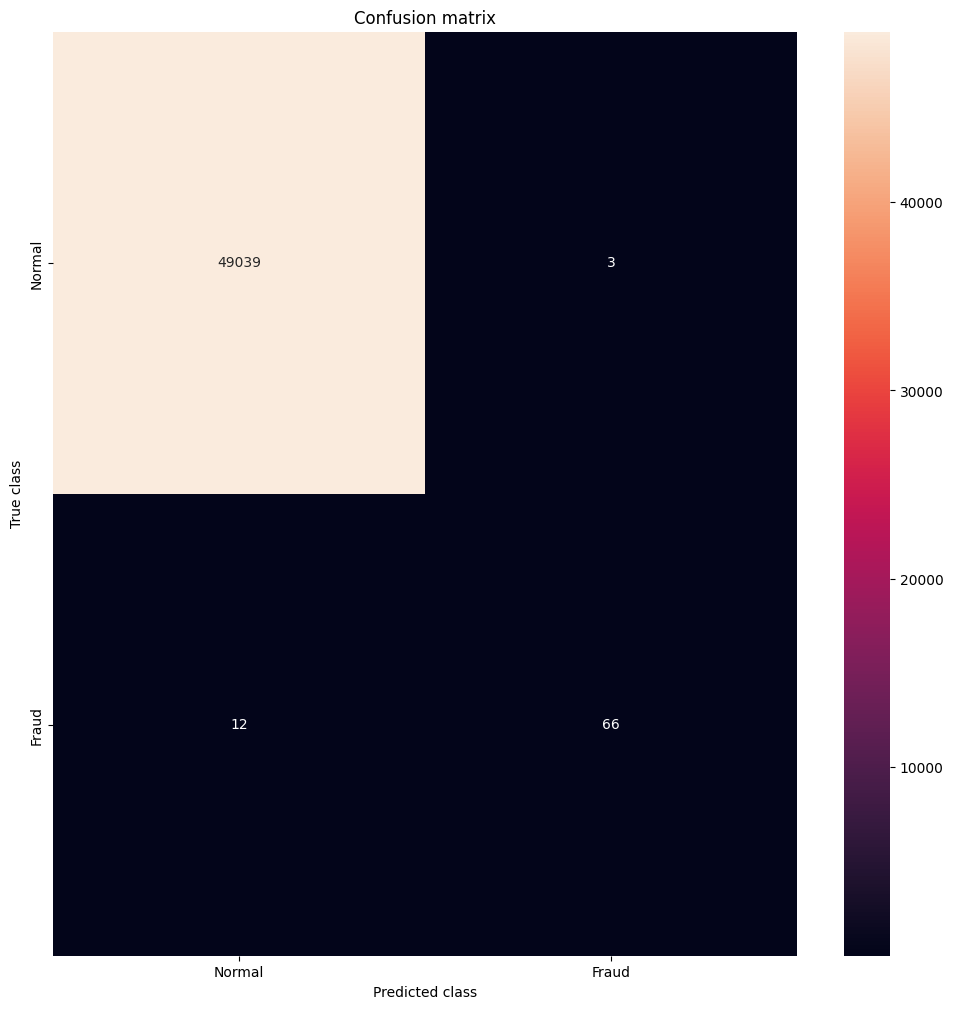

In [36]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()